In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [63]:
df = pd.read_csv("D:/credit_card_default_prediction/credit_card_default_prediction/Notebook/UCI_Credit_Card.csv",index_col='ID')
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
3,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
4,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
5,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   30000 non-null  float64
 1   SEX                         30000 non-null  int64  
 2   EDUCATION                   30000 non-null  int64  
 3   MARRIAGE                    30000 non-null  int64  
 4   AGE                         30000 non-null  int64  
 5   PAY_0                       30000 non-null  int64  
 6   PAY_2                       30000 non-null  int64  
 7   PAY_3                       30000 non-null  int64  
 8   PAY_4                       30000 non-null  int64  
 9   PAY_5                       30000 non-null  int64  
 10  PAY_6                       30000 non-null  int64  
 11  BILL_AMT1                   30000 non-null  float64
 12  BILL_AMT2                   30000 non-null  float64
 13  BILL_AMT3                   30000 no

In [65]:
df.duplicated().sum()

35

In [66]:
df.isna().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default_payment_next_month    0
dtype: int64

In [67]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default_payment_next_month'],
      dtype='object')

In [68]:
Bill_Amount=[]
for i in range(11,17):
    Bill_Amount.append(df.columns[i])
Payment_Amount=[]
for i in range(17,23):
   Payment_Amount.append(df.columns[i])
    
print(Bill_Amount,Payment_Amount)  

['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6'] ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']


In [69]:
df['deficit']= df[Bill_Amount].sum(axis=1).astype(int) - df[Payment_Amount].sum(axis=1).astype(int)

In [70]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month,deficit
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,7015
2,120000.0,2,2,2,26,-1,2,0,0,0,...,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,12077
3,90000.0,2,2,2,34,0,0,0,0,0,...,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,90635
4,50000.0,2,2,1,37,0,0,0,0,0,...,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,222946
5,50000.0,1,2,1,57,-1,0,-1,0,0,...,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,50290


In [71]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month,deficit
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200,2.382103e+05
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062,3.631651e+05
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000,-2.671514e+06
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000,4.520750e+03
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000,1.019230e+05
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000,3.057178e+05
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000,4.116080e+06


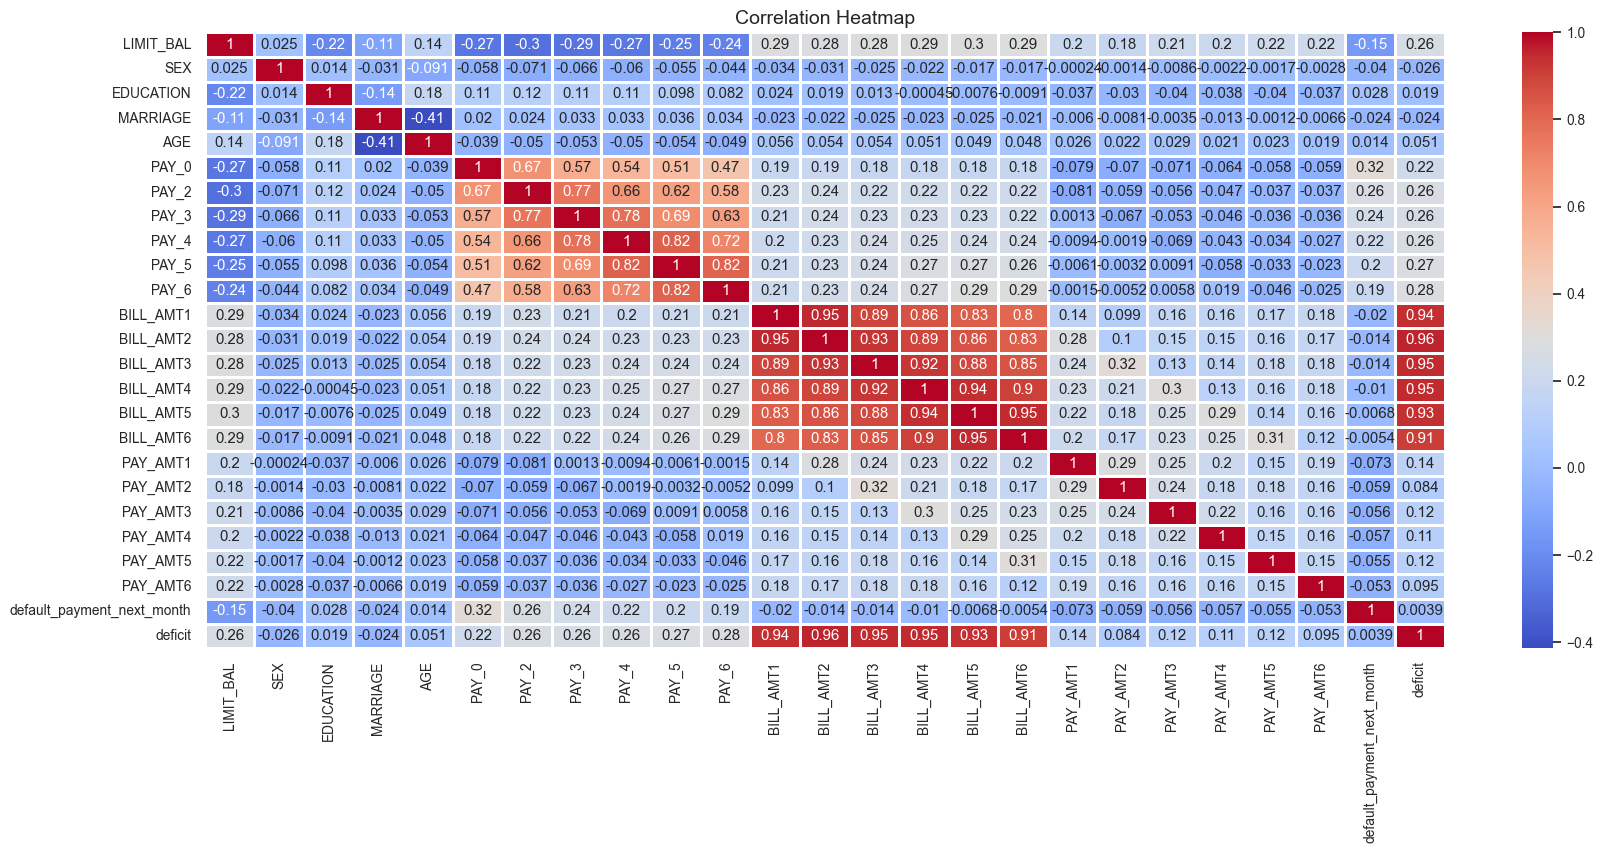

In [72]:
plt.figure(figsize=(20,8))  # Adjust the figure size as needed
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=1)
plt.title("Correlation Heatmap", fontsize = 14)
plt.show()

In [73]:
grouped = df.groupby(['SEX', 'MARRIAGE', 'EDUCATION'])['default_payment_next_month'].count().reset_index()
grouped = grouped.rename(columns={'default_payment_next_month': 'default_payment_next_month_Count'})
grouped.head()

,SEX,MARRIAGE,EDUCATION,default_payment_next_month_Count
0,1,0,1,1
1,1,0,2,1
2,1,0,3,12
3,1,1,0,2
4,1,1,1,1690


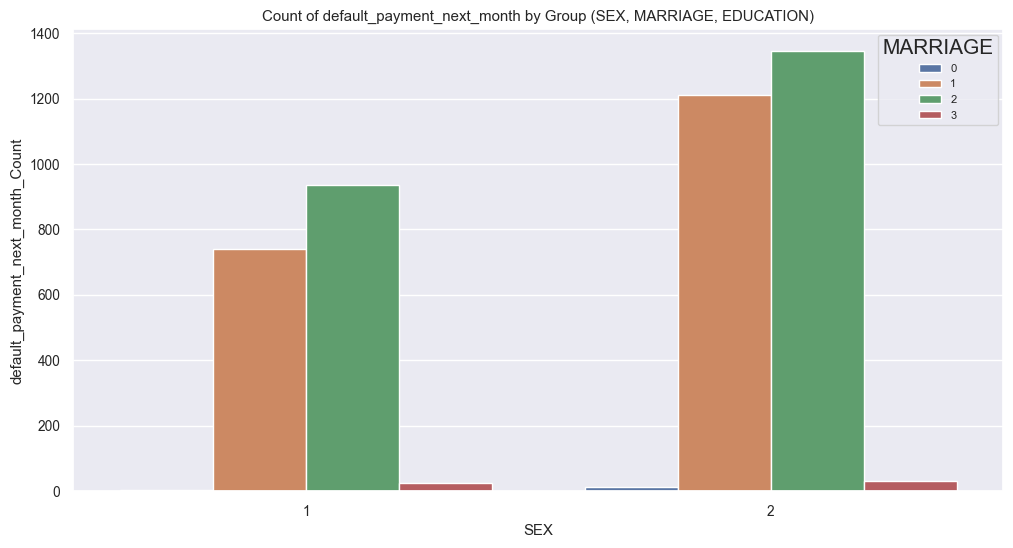

In [74]:
plt.figure(figsize=(12, 6))
ax=sns.barplot(x='SEX', y='default_payment_next_month_Count', hue='MARRIAGE', data=grouped, ci=None)
plt.title('Count of default_payment_next_month by Group (SEX, MARRIAGE, EDUCATION)')
plt.xlabel('SEX')
plt.ylabel('default_payment_next_month_Count')
plt.legend(title='MARRIAGE', title_fontsize='15')
plt.show()

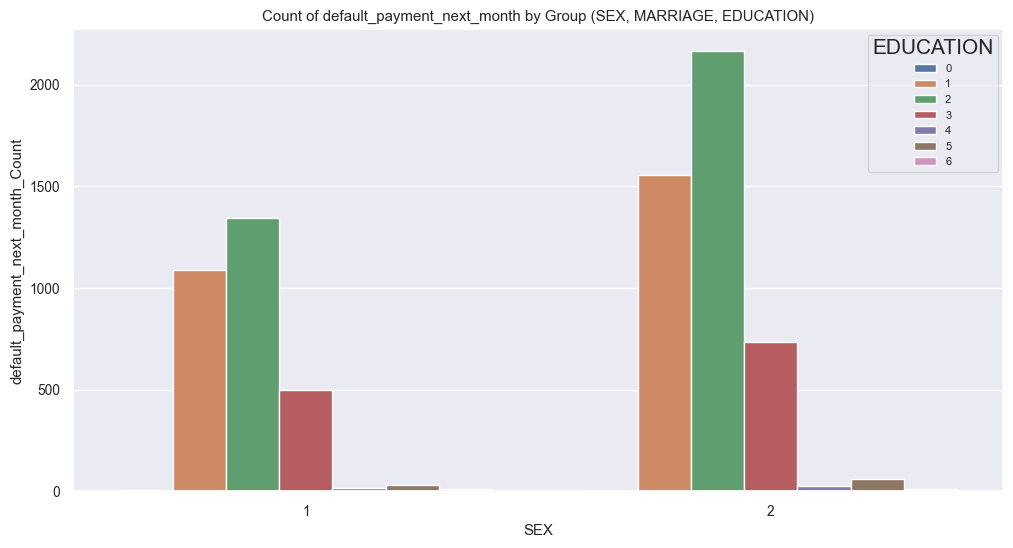

In [75]:
plt.figure(figsize=(12, 6))
sns.barplot(x='SEX', y='default_payment_next_month_Count', hue='EDUCATION', data=grouped, ci=None)
plt.title('Count of default_payment_next_month by Group (SEX, MARRIAGE, EDUCATION)')
plt.xlabel('SEX')
plt.ylabel('default_payment_next_month_Count')
plt.legend(title='EDUCATION', title_fontsize='15')
plt.show()

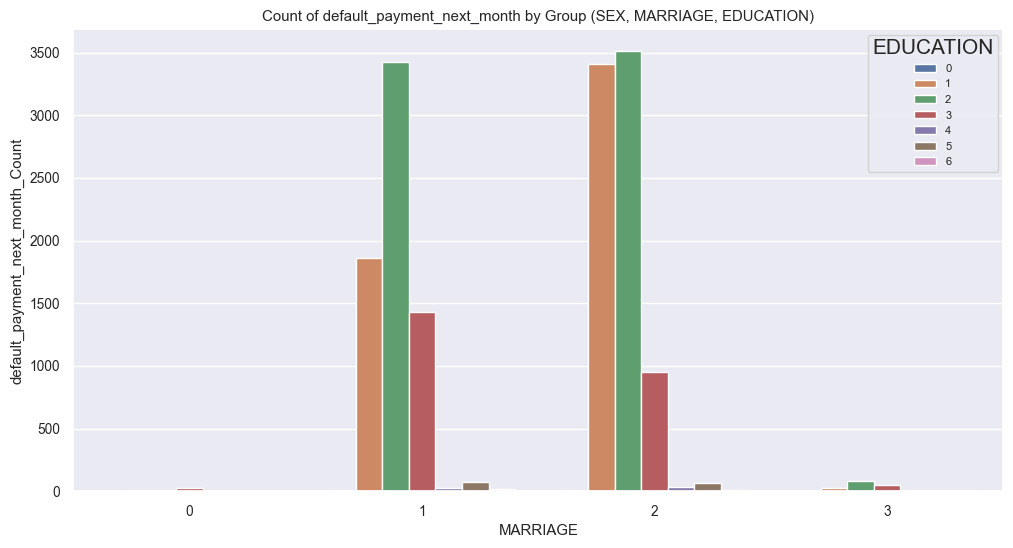

In [76]:
plt.figure(figsize=(12, 6))
sns.barplot(x='MARRIAGE', y='default_payment_next_month_Count', hue='EDUCATION', data=grouped, ci=None)
plt.title('Count of default_payment_next_month by Group (SEX, MARRIAGE, EDUCATION)')
plt.xlabel('MARRIAGE')
plt.ylabel('default_payment_next_month_Count')
plt.legend(title='EDUCATION', title_fontsize='15')
plt.show()

In [77]:
df_1 =df.copy()
df_1['EDU_/_SEX_/_MARR'] = df['EDUCATION'].astype(str) + ' / ' + df['SEX'].astype(str) + ' / ' + df['MARRIAGE'].astype(str)
df_1.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month,deficit,EDU_/_SEX_/_MARR
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,7015,2 / 2 / 1
2,120000.0,2,2,2,26,-1,2,0,0,0,...,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,12077,2 / 2 / 2
3,90000.0,2,2,2,34,0,0,0,0,0,...,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,90635,2 / 2 / 2
4,50000.0,2,2,1,37,0,0,0,0,0,...,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,222946,2 / 2 / 1
5,50000.0,1,2,1,57,-1,0,-1,0,0,...,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,50290,2 / 1 / 1


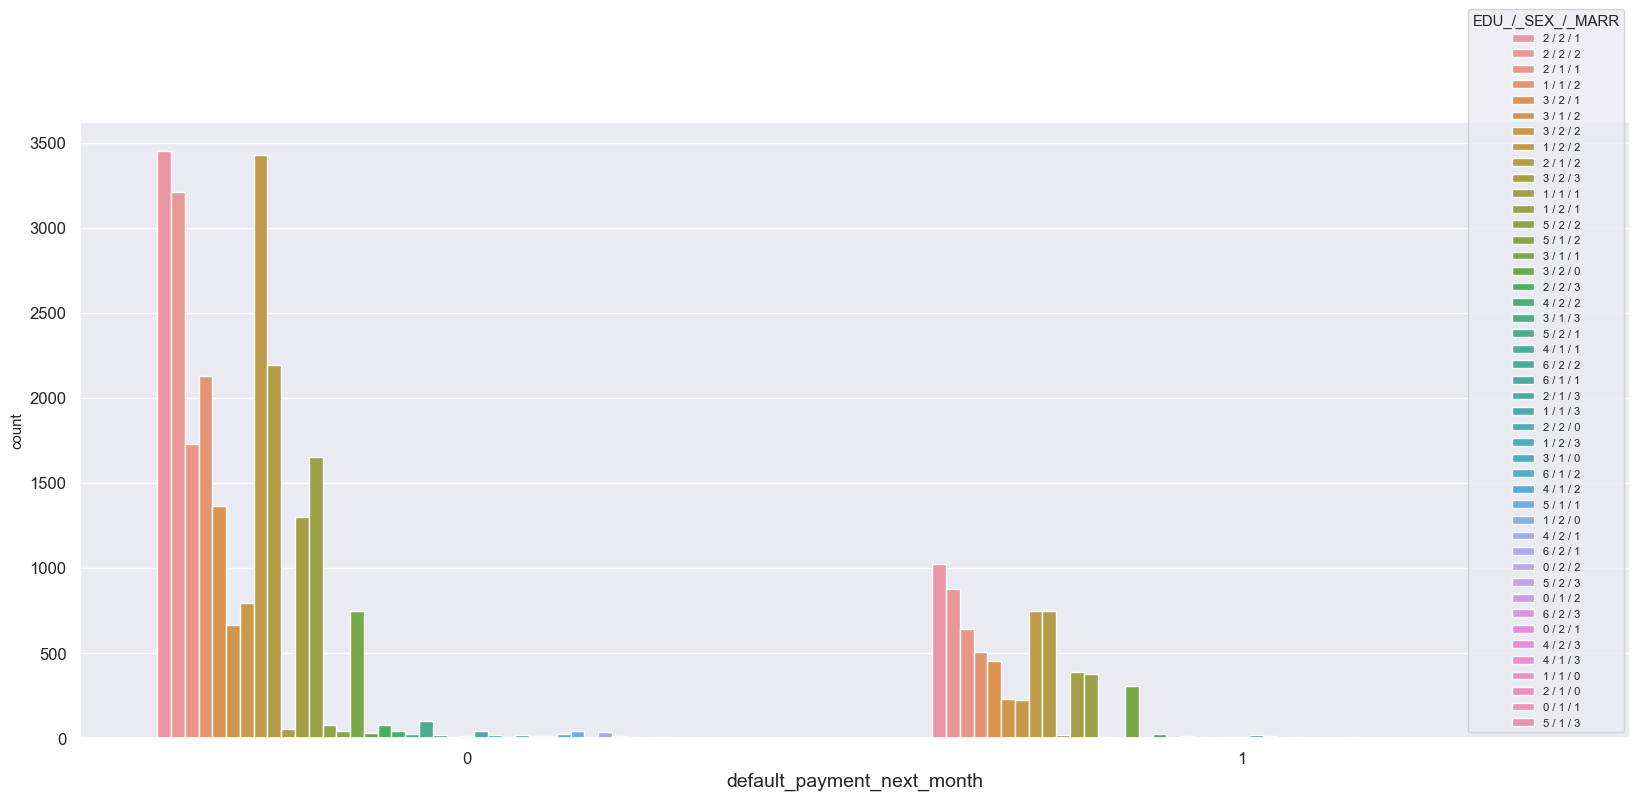

In [78]:
plt.figure(figsize=(20, 8))
sns.set(font_scale=0.9, rc={'legend.fontsize': 8})
sns.countplot(x='default_payment_next_month', hue ='EDU_/_SEX_/_MARR', data=df_1)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('default_payment_next_month',fontsize = 14)
#plt.ylable('count',fontsize = 14)
plt.show()

Text(0.5, 0, 'LIMIT_BAL')

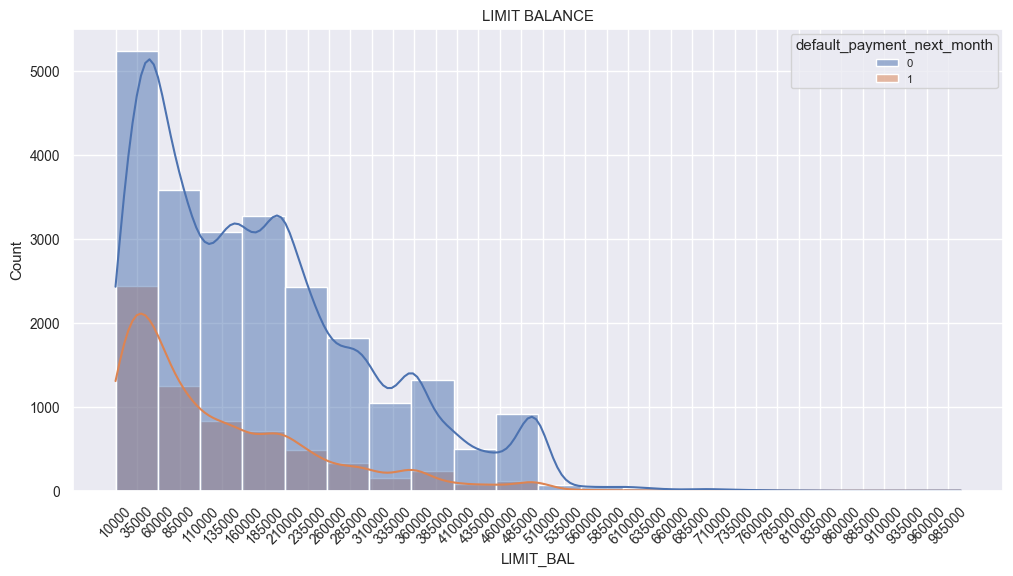

In [79]:
plt.figure(figsize=(12,6))
sns.histplot(x='LIMIT_BAL', data=df, hue='default_payment_next_month', bins=20, binrange=(10000,1000000), kde=True )
plt.xticks(range(10000, 1000000, 25000), rotation=45)
plt.title("LIMIT BALANCE")
plt.xlabel("LIMIT_BAL")

Text(0.5, 0, 'AGE')

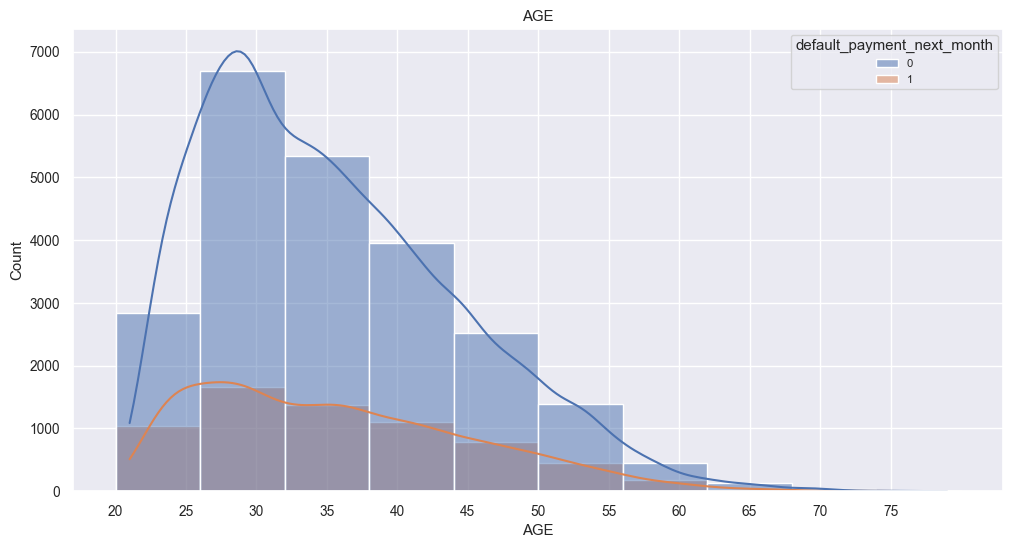

In [80]:
plt.figure(figsize=(12,6))
sns.histplot(x='AGE', data=df, hue='default_payment_next_month', bins=10, binrange=(20,80), kde=True )
plt.xticks(range(20, 80, 5), rotation=0)
plt.title("AGE")
plt.xlabel("AGE")

In [81]:
min = df.deficit.min()
max = df.deficit.max()

Text(0.5, 0, 'deficit')

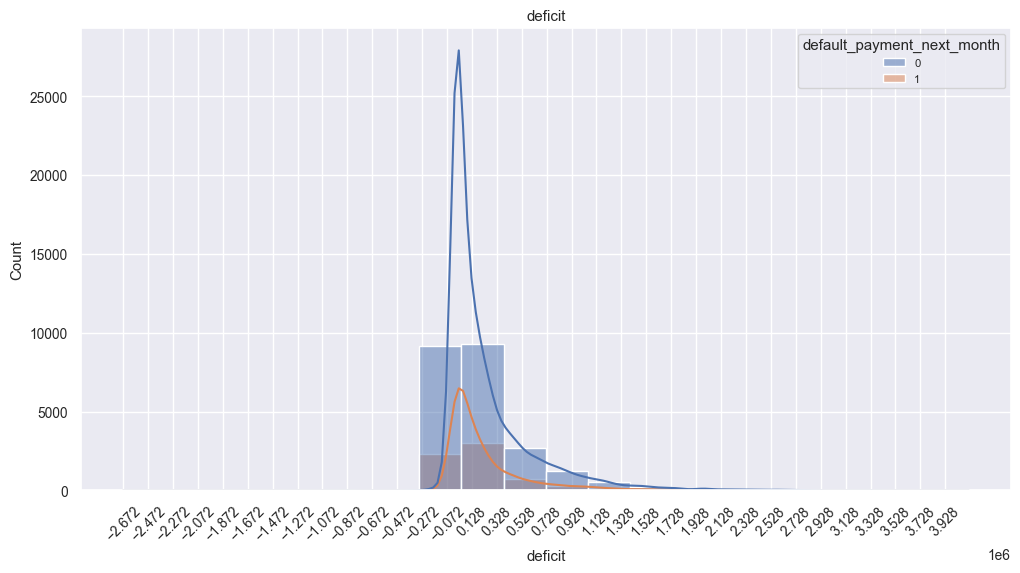

In [82]:
plt.figure(figsize=(12,6))
sns.histplot(x='deficit', data=df, hue='default_payment_next_month', bins=20, binrange=(min,max), kde=True )
plt.xticks(range(min, max, 200000), rotation=45)
plt.title("deficit")
plt.xlabel("deficit")

In [83]:
target_col=df["default_payment_next_month"]
target_col

ID
1        1
2        1
3        0
4        0
5        0
        ..
29996    0
29997    0
29998    1
29999    1
30000    1
Name: default_payment_next_month, Length: 30000, dtype: int64

In [84]:
df['default_payment_next_month'].value_counts()

default_payment_next_month
0    23364
1     6636
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x2a14d61bb50>,
 [Text(-0.8449152390547128, 0.704356613380692, 'Not default_payment_next_month'),
  Text(0.8449152720280249, -0.7043565738273541, 'default_payment_next_month')],
 [Text(-0.46086285766620694, 0.38419451638946833, '77.88%'),
  Text(0.46086287565164985, -0.38419449481492035, '22.12%')])

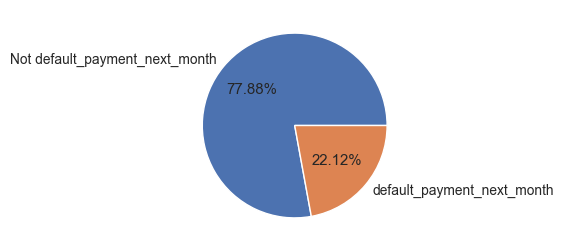

In [85]:
plt.figure(figsize=(3,3))
plt.pie(df['default_payment_next_month'].value_counts().values, 
        labels=['Not default_payment_next_month','default_payment_next_month'],autopct='%0.2f%%')

In [86]:
data = df.drop("default_payment_next_month",axis=1)
data.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'deficit'],
      dtype='object')

In [87]:
numerical_feature=[feature for feature in data.columns if data[feature].dtype != 'O']
numerical_feature

['LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'deficit']

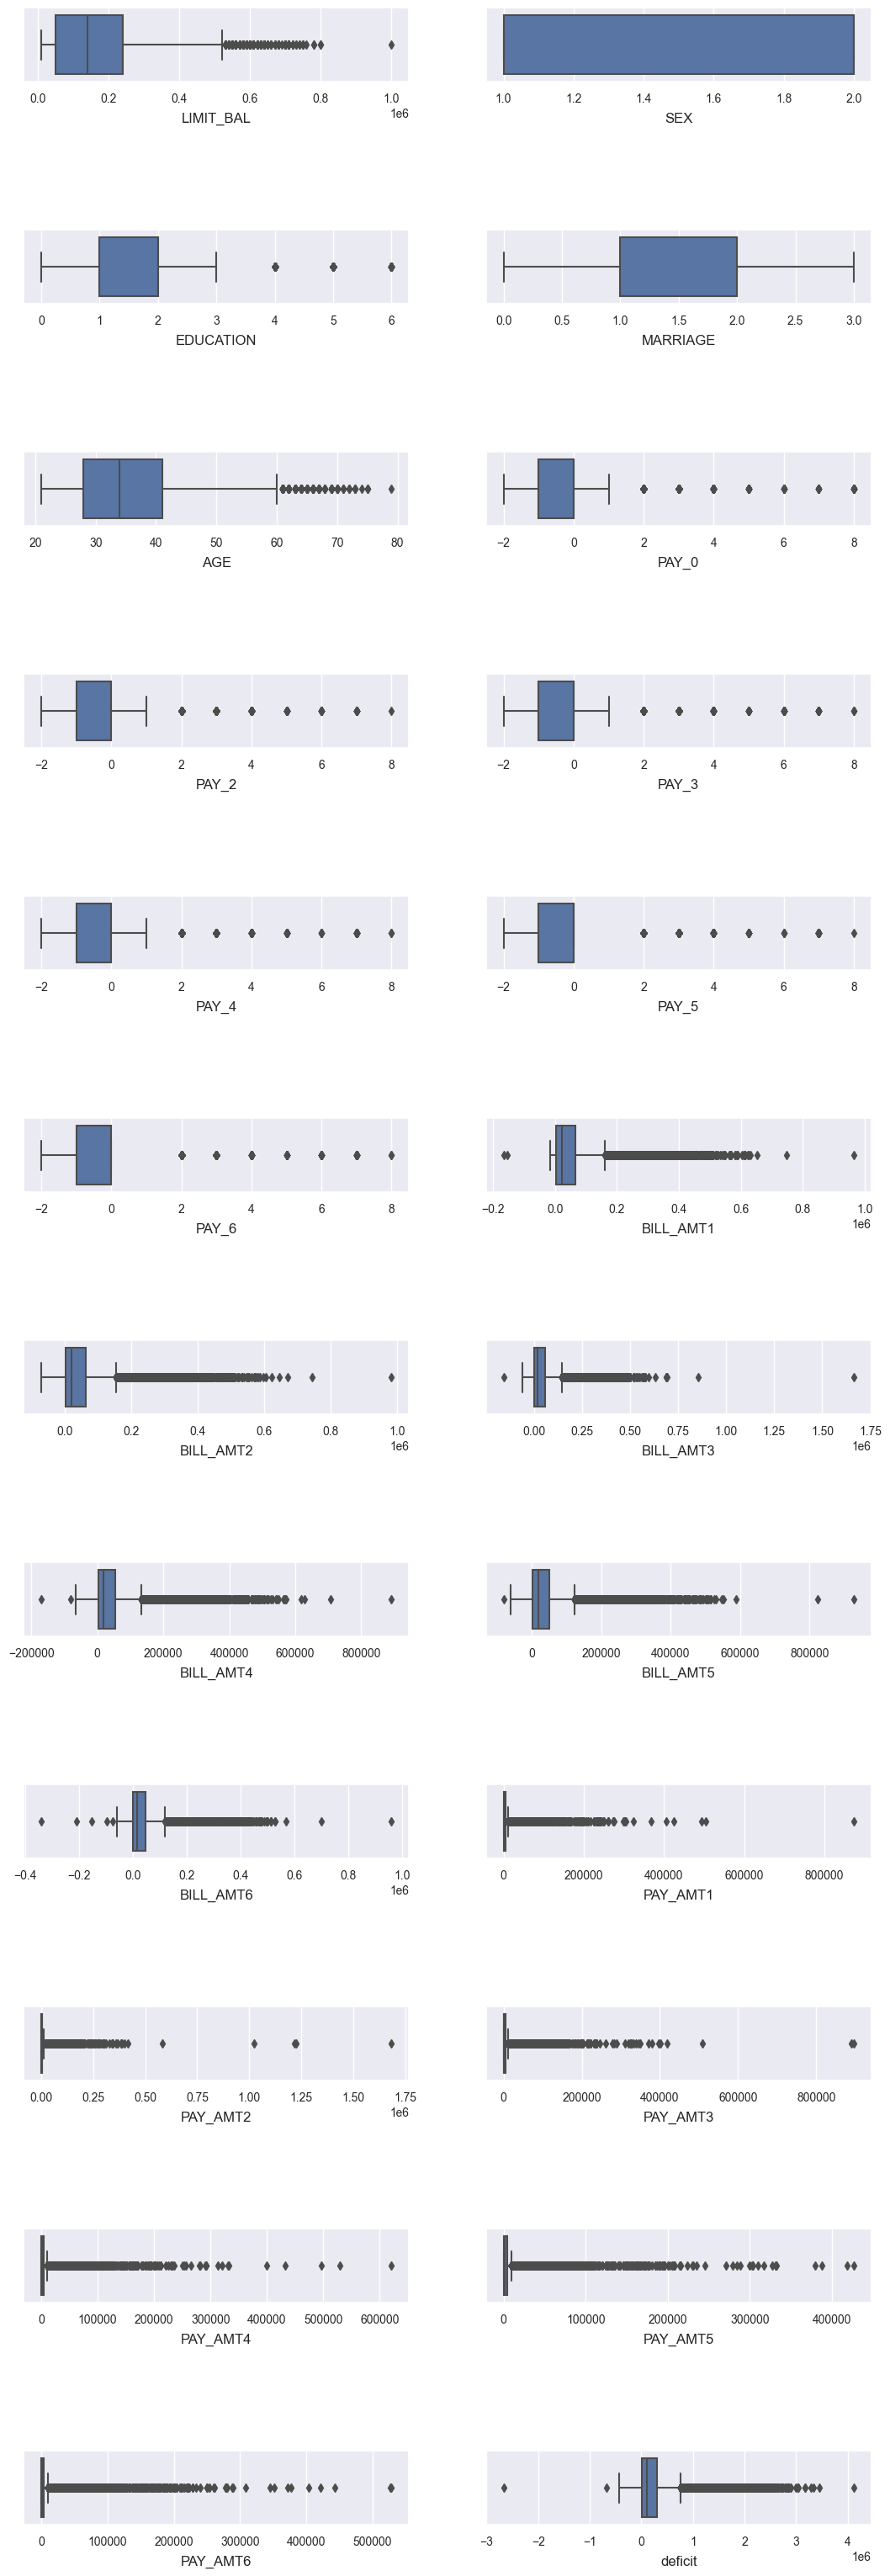

In [88]:
plt.figure(figsize=(13,80))
for i,col_name in enumerate(numerical_feature):
    plt.subplot(len(numerical_feature),2,i+1)
    sns.boxplot(x=col_name,data=data)
    plt.xticks(fontsize=10)
    plt.xlabel(col_name,labelpad=6, fontsize=12)
plt.subplots_adjust(hspace=2.0)

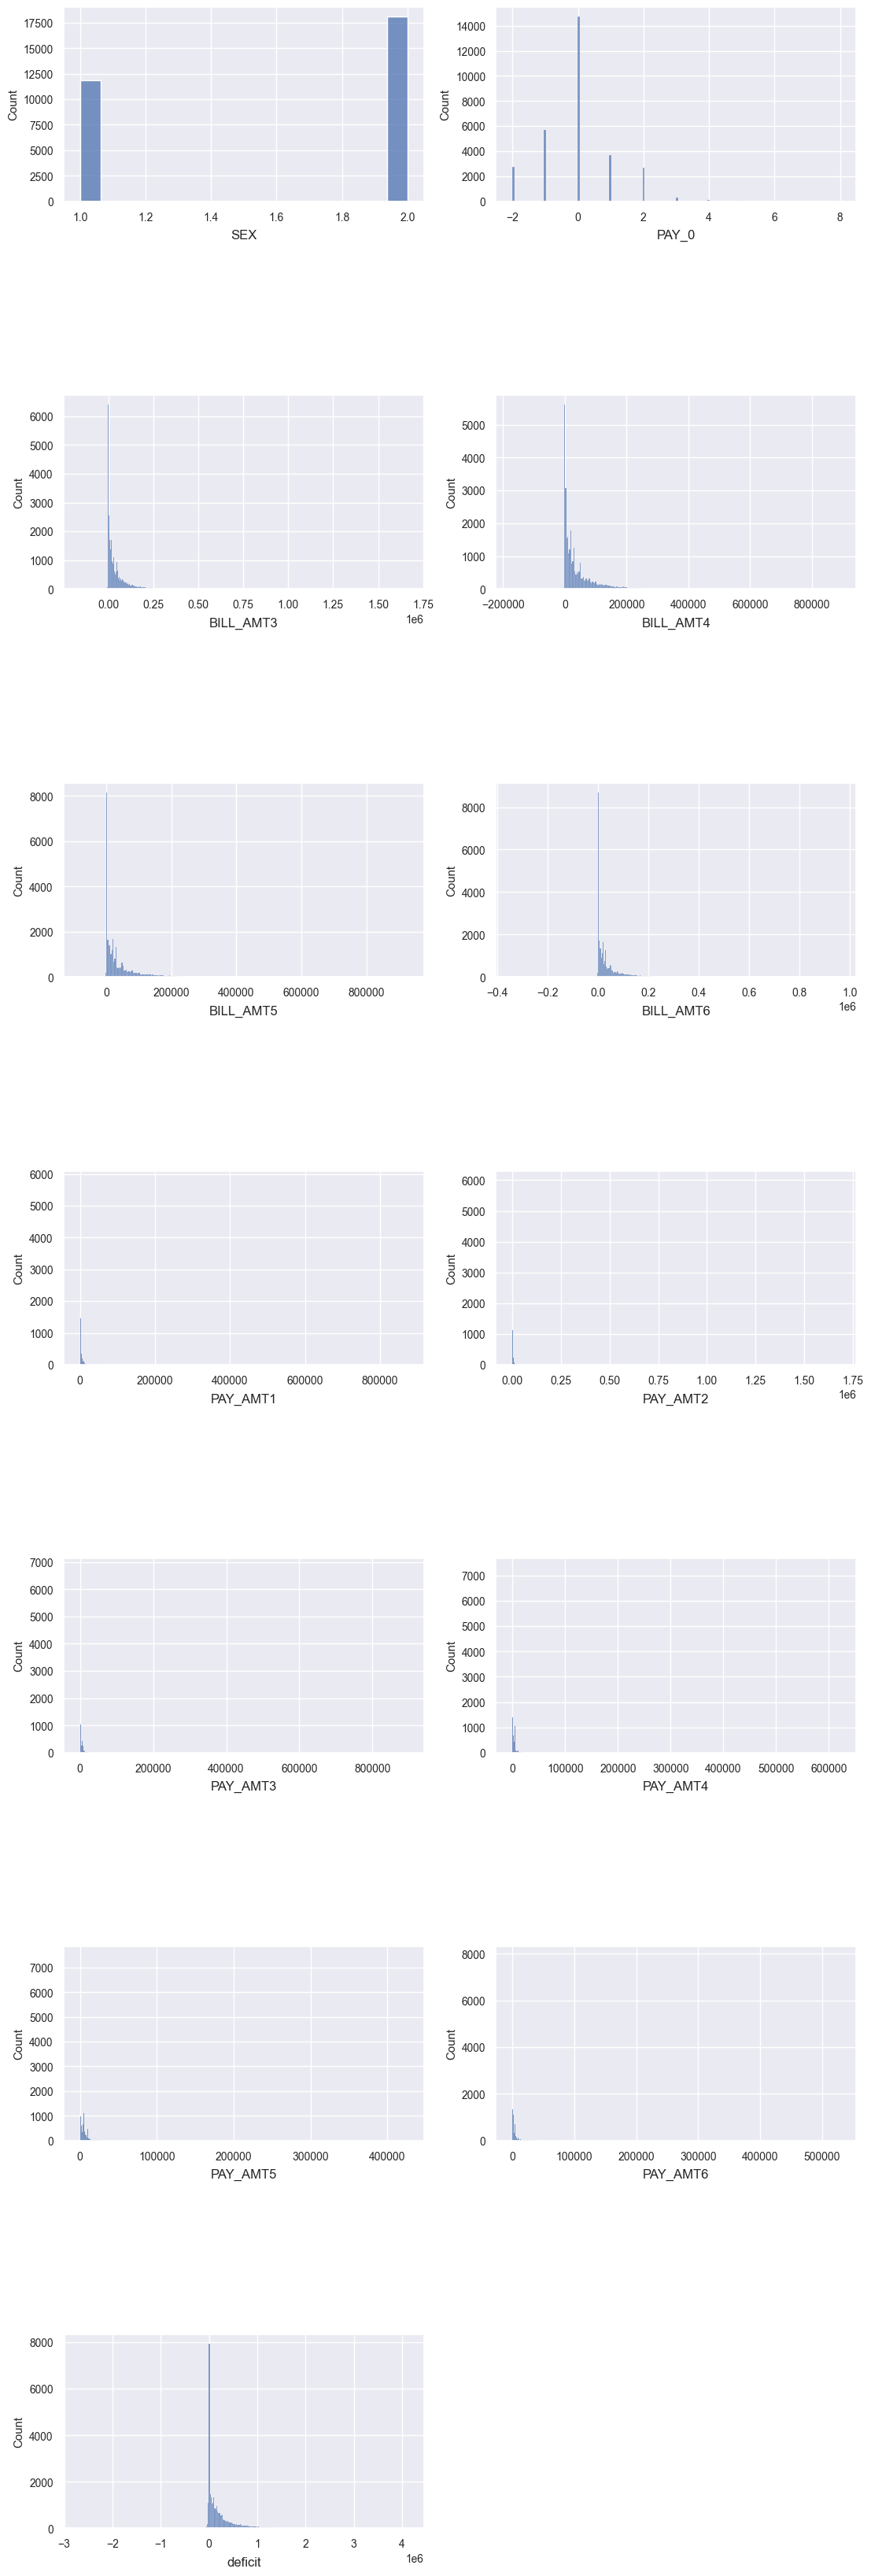

In [89]:
plt.figure(figsize=(13,80))
for i,col_name in enumerate(numerical_feature[1:2] + numerical_feature[5:6] + numerical_feature[13:24]):
    plt.subplot(len(numerical_feature[1:2] + numerical_feature[5:6] + numerical_feature[13:24]),2,i+1)
    sns.histplot(x=col_name,data=data)
    plt.xticks(fontsize=10)
    plt.xlabel(col_name,labelpad=6, fontsize=12)
plt.subplots_adjust(hspace=1.0)